# Check rho-/tau-stats data and JK covariance data. 

In [1]:
import numpy as np

# statistics files
rho_stats = np.genfromtxt('/global/cscratch1/sd/myamamot/metadetect/rho_tau_stats/rho_all_JK_v3_griz.dat')
tau_stats = np.genfromtxt('/global/cscratch1/sd/myamamot/metadetect/rho_tau_stats/tau_all_JK_v3_griz.dat')

# covariance files
rho_cov = np.load('/global/cscratch1/sd/myamamot/metadetect/rho_tau_stats/rho_multi_cov_v3.npy')
tau_cov = np.load('/global/cscratch1/sd/myamamot/metadetect/rho_tau_stats/tau_multi_cov_v3.npy')

(288, 288) (144, 144)
24.0 24.0


Text(0.5, 1.0, '$\\tau$-stats. Covariance Matrix')

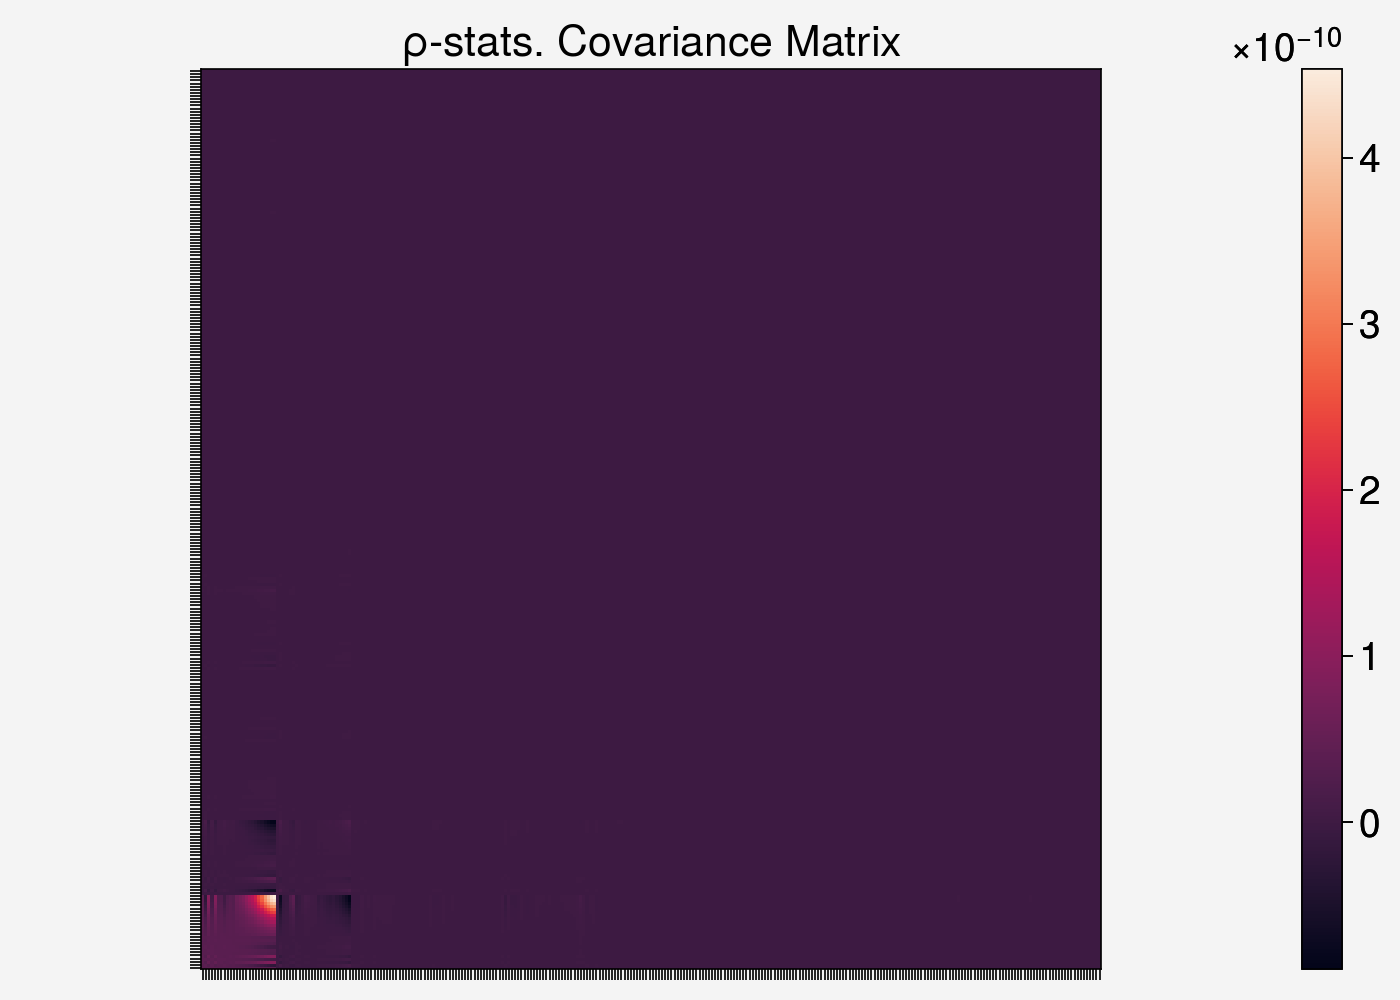

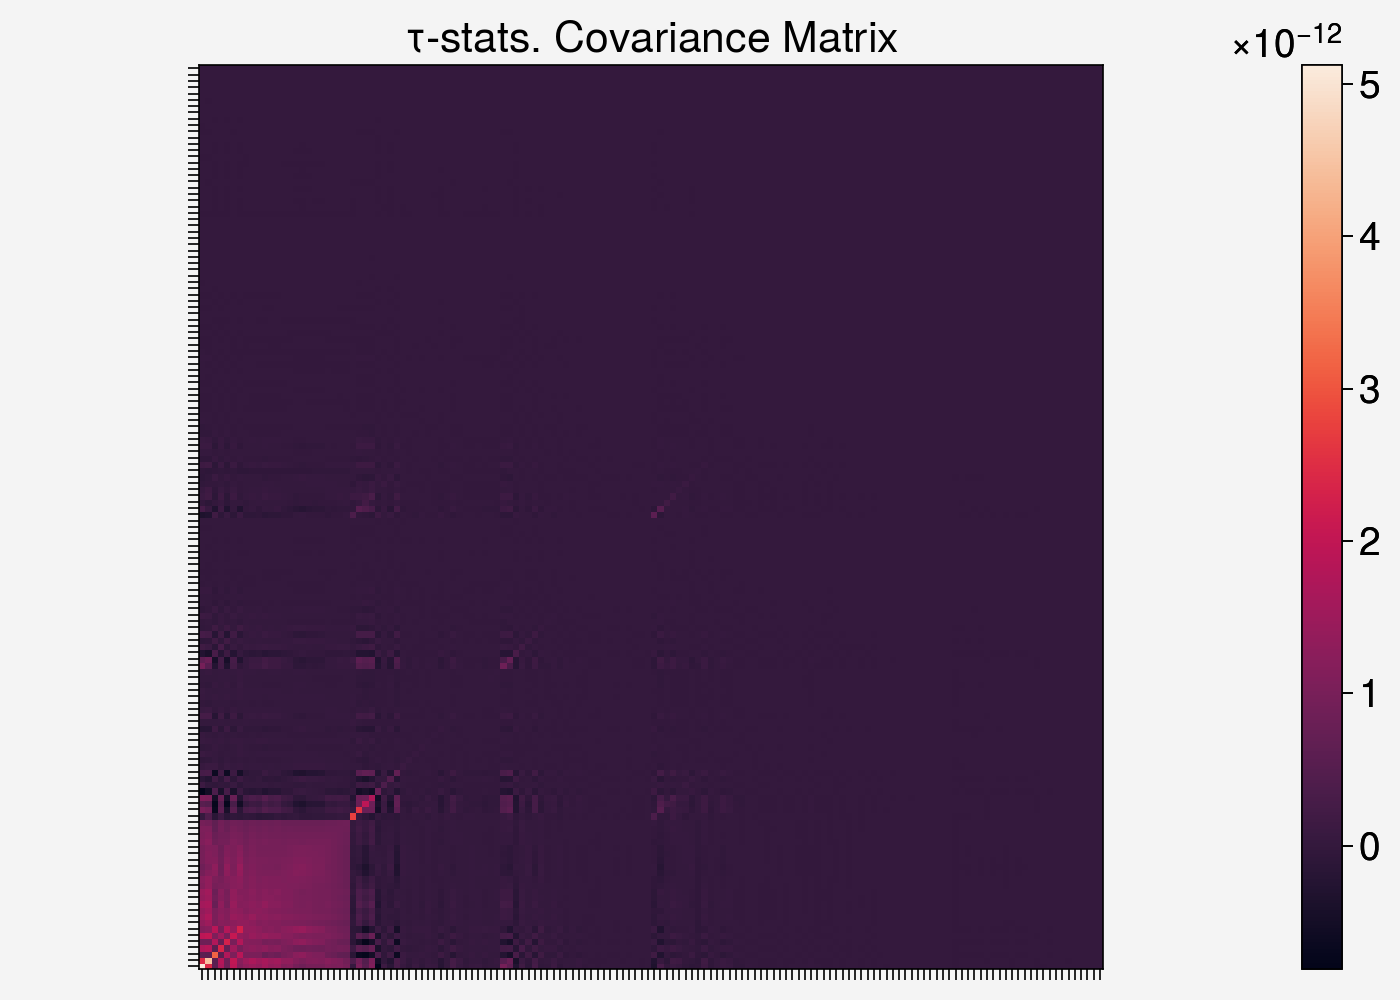

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import proplot as pplt
from matplotlib.colors import LogNorm, Normalize

print(rho_cov.shape, tau_cov.shape)
print(rho_cov.shape[0]/12, tau_cov.shape[0]/6) 

mpl.rcParams.update({'font.size':14})
fig = pplt.figure(figsize=(7,5))
ax = fig.subplots(nrows=1, ncols=1)

im = ax.heatmap(rho_cov, cmap='rocket')
ax.colorbar(im, loc='r')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(r'$\rho$-stats. Covariance Matrix')

mpl.rcParams.update({'font.size':14})
fig = pplt.figure(figsize=(7,5))
ax = fig.subplots(nrows=1, ncols=1)
im2 = ax.heatmap(tau_cov, cmap='rocket')
ax.colorbar(im2, loc='r')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(r'$\tau$-stats. Covariance Matrix')

In [27]:
# rho_stats: meanr(0), rho1p(1), rho1m(2), sig_rho1, rho2p(4), rho2m(5), sig_rho2, rho3p(7), rho3m(8), sig_rho3, rho4p(10), rho4m(11), sig_rho4, rho5p(13), rho5m(14), sig_rho5, rho0p(16), rho0m(17), sig_rho0
# tau_stats: meanr(0), tau0p(1), tau0m(2), sig_tau0(3), tau2p(4), tau2m(5), sig_tau2(6), tau5p(7), tau5m(8), sig_tau5(9)

# Make rho-/tau-files necessary to run alpha, beta, eta test from rho-/tau-statistics.

In [3]:
from astropy.io import fits
tau0marr = tau_stats[2]
tau2marr = tau_stats[5]
tau5marr = tau_stats[8]
tau0parr = tau_stats[1]
tau2parr = tau_stats[4]
tau5parr = tau_stats[7]
covmat = tau_cov  # insert here your covariance matrix. Must be ['TAU0P', 'TAU0M','TAU2P','TAU2M', 'TAU5P', 'TAU5M'] x ['TAU0P', 'TAU0M','TAU2P','TAU2M', 'TAU5P', 'TAU5M']
angarray = tau_stats[0] # include angular bins here

taus = [tau0parr, tau0marr, tau2parr, tau2marr, tau5parr, tau5marr]
taus_names = ['TAU0P', 'TAU0M', 'TAU2P', 'TAU2M', 'TAU5P', 'TAU5M']
##Format of the fit file output



names=['BIN1', 'BIN2', 'ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = len(tau0marr)
outdata = np.recarray((nrows, ), dtype=dtype)

hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)



for j, nam in enumerate(taus_names):
    outdata = np.recarray((nrows, ), dtype=dtype)
    array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
    for array, name in zip(array_list, names): 
        outdata[name] = array

    corrhdu = fits.BinTableHDU(outdata, name=nam)
    hdul.insert(j+2, corrhdu)
    
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'TAU0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'TAU2'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'TAU5'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'

hdul.writeto('/global/cscratch1/sd/myamamot/metadetect/abe_test/tau_JK_v3_Y6_nontomographic.fits', overwrite=False)

print ("done")

done


In [4]:
entries=["rho0_p","rho0_m","rho1_p","rho1_m","rho2_p","rho2_m","rho3_p","rho3_m","rho4_p","rho4_m","rho5_p","rho5_m"]
rhos = [rho_stats[16], rho_stats[17], 
        rho_stats[1], rho_stats[2],
        rho_stats[4], rho_stats[5],
        rho_stats[7], rho_stats[8],
        rho_stats[10], rho_stats[11],
        rho_stats[13], rho_stats[14],] #include here your rhos rho0+,rho0-, ...
rhos_names = ['RHO0P', 'RHO0M','RHO1P','RHO1M','RHO2P','RHO2M','RHO3P','RHO3M', 'RHO4P','RHO4M', 'RHO5P', 'RHO5M']
covmat = rho_cov #this is the covariance of the rhos stats; it's not really used so you can put in whatever...
angarray = rho_stats[0] # include angular bins here


names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = 24
outdata = np.recarray((nrows, ), dtype=dtype)

hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)


for j, nam in enumerate(rhos_names):
    outdata = np.recarray((nrows, ), dtype=dtype)
    array_list = [bin1array, bin2array, angbinarray,np.array(rhos[j]),  angarray ]
    for array, name in zip(array_list, names): 
        outdata[name] = array

    corrhdu = fits.BinTableHDU(outdata, name=nam)
    hdul.insert(j+2, corrhdu)
    
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'RHO0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'RHO1'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'RHO2'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[1].header['NAME_3'] =  'RHO3'
hdul[1].header['STRT_3'] =  3*nrows
hdul[1].header['LEN_3'] = nrows
hdul[1].header['NAME_4'] =  'RHO4'
hdul[1].header['STRT_4'] =  4*nrows
hdul[1].header['LEN_4'] = nrows
hdul[1].header['NAME_5'] =  'RHO5'
hdul[1].header['STRT_5'] =  5*nrows
hdul[1].header['LEN_5'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'


    
hdul.writeto('/global/cscratch1/sd/myamamot/metadetect/abe_test/rho_JK_v3_Y6_nontomographic.fits', overwrite=False)

print ("done")

done


# Don't forget to change the hartlap correction part! 
https://darkenergysurvey.slack.com/archives/C038QRECCNP/p1648238255720499

# Run abe_test.py as following.